In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Raw Data 전처리 (인플루언서, 상품, 소비자) - 이미지 정보 제외 raw 데이터 처리  
- 이미지 정보는 향후 image captioning을 거친 후 전처리 진행  
 * data.json 파일의 key값을 데이터프레임의 열로 이용  
 인플루언서: (post_id, user_name,	kr_text,	en_text,	date, season)  
 상품정보: (image_id, category,	look_name,	style_text,	tag,	product)  
 소비자: (post_id, user_name, kr_text, en_text, date)

 - 1차적으로 정리된 전처리 데이터는 향후 상황에 맞춰 사용

In [ ]:
#라이브러리
import pandas as pd
import json
import os
import datetime as dt
import re 

In [ ]:
# 인플루언서

# 사전에 제공된 인플루언서ID_리스트 활용
txt_file=os.path.join("/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서ID_리스트.txt")
user=open(txt_file)

# post_id
post_id=[]
# user_name
user_name=[]
# 국문 텍스트
kr_text=[]
# 각 포스트의 게시날짜
timestamp=[]
# 각 포스트의 계절
season=[]
# 영문 텍스트
en_text=[]

for name in user.readlines():
    
    # 양끝 개행문자 제거
    name=name.strip()
    with open(f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/{name}/data.json', 'r', encoding='utf-8') as f:

        # 각 인플루언서의 data.json 로드
        data = json.load(f)

        for pid in range(len(data)):
            # KeyError를 처리하기 위해 try 구문 사용
            try:
                post_id.append(str(data[pid]['post_id']))
            except:
                post_id.append(None)
                
            try:
                # 특수문자 그대로 사용
                user_name.append(name)
            except:
                user_name.append(None)
            
            # text에서 영단어 및 단어만 추출
            kr_text_temp=[]
            en_text_temp=[]
            try:
                temp=data[pid]['text']
                temp=re.sub('[^A-Za-z가-힣]',' ',temp).split()
                for word in temp:
                    
                    # 첫번째 인덱스의 원소가 영어인가?
                    flag_first=('a'<=word[0]<='z' or 'A'<=word[0]<='Z')
                    # 마지막 인덱스의 원소가 영어인가?
                    flag_last=('a'<=word[-1]<='z' or 'A'<=word[-1]<='Z')
                    
                    # 영어로만 이루어진 단어
                    if (flag_first and (flag_first==flag_last)):
                        en_text_temp.append(word)
                    # 한국어로만 이루어진 단어
                    elif(flag_first == flag_last):
                        kr_text_temp.append(word)
            except:
                kr_text_temp=[]
                en_text_temp=[]
                
            kr_text.append(kr_text_temp)
            en_text.append(en_text_temp)
            
            # timestamp to date
            # timestamp 형식에서 뒤에 세자리는 의미없는 수이므로 제외
            try:
                temp=str(data[0]['timestamp'])[:-3]
                date=str(dt.date.fromtimestamp(int(temp)))
                timestamp.append(date)
                if date[5:7] in ('12','01','02'):
                    season.append('겨울')
                elif date[5:7] in ('03','04','05'):
                    season.append('봄')
                elif date[5:7] in ('06','07','08'):
                    season.append('여름')
                else:
                    season.append('가을')
            except:
                timestamp.append(None)
                season.append(None)
            
temp_dict={'post_id':post_id,'user_name':user_name, 'kr_text':kr_text, 'en_text':en_text ,'date':timestamp,'season':season}
index=[i for i in range(1,len(post_id)+1)]
frame = pd.DataFrame(temp_dict,index)
#frame.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_전처리.xlsx')
user.close()

In [ ]:
frame

,post_id,user_name,kr_text,en_text,date,season
1,3008721893260657311,@by_he.nique,"[타임, 세일, 디토, 반집업, 원피스, 오픈했어요, 약, 발송, 상품으로, 결제,...","[OPEN, goong, tol, zynsol, midoni, ya]",2023-01-05,겨울
2,3003648281577546327,@by_he.nique,"[기모, 안감, 으로, 추운, 날에도, 끄떡없는, 지금까지, 보여드린, 제작, 기모...","[TIME, SALE, OPEN, THU]",2023-01-05,겨울
3,2997852449997755545,@by_he.nique,"[타임, 세일, 오직, 히니크에서만, 만날, 수, 있는, 단독, 진행, 상품으로, ...","[OPEN, cm]",2023-01-05,겨울
4,3008794918635042204,@by_he.nique,"[퍼, 아이템은, 정말]",[],2023-01-05,겨울
5,3008710813922767565,@by_he.nique,"[데님부터, 트레이닝까지, 다, 잘, 어울리는, 만능, 니트]",[],2023-01-05,겨울
...,...,...,...,...,...,...
2985,2982489217995043025,@166.ootd,"[단추가, 귀여운, 니트, 오늘, 춥다고, 해서, 겹겹이, 입어보았숩니다, 바지는,...","[daliylook, ootd]",2023-01-03,겨울
2986,2981765583978615629,@166.ootd,"[히트텍을, 입고, 달리면, 무진장, 더워요, 울치마가, 너무, 입고, 싶어서, 입...","[daliylook, ootd]",2023-01-03,겨울
2987,2980467126373790422,@166.ootd,"[협찬, 놀러갈, 때, 들기, 좋은, 에코백, 겨울에, 어울리는, 코듀로이재질로, ...","[mind, gift, daliylook, ootd]",2023-01-03,겨울
2988,2978864033358511178,@166.ootd,"[제가, 좋아하는, 색감, 오늘은, 드디어, 금요일, 여러분, 저, 월요일, 연차입...","[daliylook, ootd]",2023-01-03,겨울


In [ ]:
# 상품정보

# image_id
image_id=[]
# category
category=[]
# lookname
look_name=[]
# style_text
style_text=[]
# tag
tag=[]
# 상품 종류
product=[]

# 캐주얼.json -> 캐주얼_decode.json으로 decoding한 후 사용
with open(f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Json/캐주얼_decode.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    image_id=list(data.keys())
    for pk in range(len(image_id)):
        
        # 하나의 dict으로 관리
        temp_data=data[image_id[pk]]
        
        # category 단어 추출 str형태
        try:
            category.append(temp_data['category'])
        except:
            category.append(None)
        
        # look_name 단어 추출 str형태
        try:
            look_name.append(temp_data['look_name'])
        except:
            look_name.append(None)
        # style_text 단어 추출 list 형태
        try:
            style_text.append(temp_data['style_text'].split())
        except:
            style_text.append(None)
            
        # tag 단어 추출 list 형태
        try:
            tag.append(temp_data['tag'])
        except:
            tag.append(None)
            
        # 상품 종류 명시
        try:
            temp_list=image_id[pk].split('_')
            product.append(temp_list[1])
        except:
            product.append(None)
            
temp_dict={'image_id':image_id,'category':category, 'look_name':look_name, 'style_text':style_text,'tag':tag,'product':product}
index=[i for i in range(1,len(image_id)+1)]
frame = pd.DataFrame(temp_dict,index)
#frame.to_excel("상품정보_전처리.xlsx")

In [ ]:
frame

,image_id,category,look_name,style_text,tag,product
1,detail_30059_1_500.jpg,캐주얼,확실한 포인트,"[편하게, 입기, 좋은, 플리스, 셋업에, 옐로, 컬러, 패딩으로, 포인트를, 준,...","[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",30059
2,detail_30059_5_500.jpg,캐주얼,확실한 포인트,"[편하게, 입기, 좋은, 플리스, 셋업에, 옐로, 컬러, 패딩으로, 포인트를, 준,...","[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",30059
3,detail_30059_2_500.jpg,캐주얼,확실한 포인트,"[편하게, 입기, 좋은, 플리스, 셋업에, 옐로, 컬러, 패딩으로, 포인트를, 준,...","[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",30059
4,detail_30059_4_500.jpg,캐주얼,확실한 포인트,"[편하게, 입기, 좋은, 플리스, 셋업에, 옐로, 컬러, 패딩으로, 포인트를, 준,...","[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",30059
5,detail_30059_3_500.jpg,캐주얼,확실한 포인트,"[편하게, 입기, 좋은, 플리스, 셋업에, 옐로, 컬러, 패딩으로, 포인트를, 준,...","[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",30059
...,...,...,...,...,...,...
327,detail_29914_5_500.jpg,캐주얼,캐주얼 무드,"[크롭, 스웨트셔츠에, 롱스커트를, 매치하고, 숏, 패딩으로, 마무리한, 캐주얼, 룩]","[겨울, 캐주얼, 뉴발란스, 바인듀, 벤시몽, 앤디아더, 오버듀플레어, 질바이질스튜...",29914
328,detail_29914_2_500.jpg,캐주얼,캐주얼 무드,"[크롭, 스웨트셔츠에, 롱스커트를, 매치하고, 숏, 패딩으로, 마무리한, 캐주얼, 룩]","[겨울, 캐주얼, 뉴발란스, 바인듀, 벤시몽, 앤디아더, 오버듀플레어, 질바이질스튜...",29914
329,detail_29914_4_500.jpg,캐주얼,캐주얼 무드,"[크롭, 스웨트셔츠에, 롱스커트를, 매치하고, 숏, 패딩으로, 마무리한, 캐주얼, 룩]","[겨울, 캐주얼, 뉴발란스, 바인듀, 벤시몽, 앤디아더, 오버듀플레어, 질바이질스튜...",29914
330,detail_29914_3_500.jpg,캐주얼,캐주얼 무드,"[크롭, 스웨트셔츠에, 롱스커트를, 매치하고, 숏, 패딩으로, 마무리한, 캐주얼, 룩]","[겨울, 캐주얼, 뉴발란스, 바인듀, 벤시몽, 앤디아더, 오버듀플레어, 질바이질스튜...",29914


In [ ]:
# 소비자
txt_file=os.path.join("/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자ID_리스트.txt")
user=open(txt_file)

# post_id
post_id=[]
# user_name
user_name=[]
# 국문 텍스트
kr_text=[]
# 각 포스트의 게시날짜
timestamp=[]
# 영문 텍스트
en_text=[]

for name in user.readlines():
    # 양끝 개행문자 제거
    name=name.strip()
    with open(f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/{name}/data.json', 'r', encoding='utf-8') as f:

        # 각 인플루언서의 data.json 로드
        data = json.load(f)

        for pid in range(len(data)):
            # KeyError를 처리하기 위해 try 구문 사용
            try:
                post_id.append(str(data[pid]['post_id']))
            except:
                post_id.append(None)
                
            try:
                # 특수문자 그대로 사용
                user_name.append(name)
            except:
                user_name.append(None)
            
            # text에서 영단어 및 단어만 추출
            kr_text_temp=[]
            en_text_temp=[]
            try:
                temp=data[pid]['text']
                temp=re.sub('[^A-Za-z가-힣]',' ',temp).split()
                for word in temp:
                    
                    # 첫번째 인덱스의 원소가 영어인가?
                    flag_first=('a'<=word[0]<='z' or 'A'<=word[0]<='Z')
                    # 마지막 인덱스의 원소가 영어인가?
                    flag_last=('a'<=word[-1]<='z' or 'A'<=word[-1]<='Z')
                    
                    # 영어로만 이루어진 단어
                    if (flag_first and (flag_first==flag_last)):
                        en_text_temp.append(word)
                    # 한국어로만 이루어진 단어
                    elif(flag_first == flag_last):
                        kr_text_temp.append(word)
            except:
                kr_text_temp=[]
                en_text_temp=[]
                
            kr_text.append(kr_text_temp)
            en_text.append(en_text_temp)
            
            # timestamp to date
            # timestamp 형식에서 뒤에 세자리는 의미없는 수이므로 제외
            try:
                temp=str(data[0]['timestamp'])[:-3]
                date=str(dt.date.fromtimestamp(int(temp)))
                timestamp.append(date)
            except:
                timestamp.append(None)

            
temp_dict={'post_id':post_id,'user_name':user_name, 'kr_text':kr_text, 'en_text':en_text ,'date':timestamp}
index=[i for i in range(1,len(post_id)+1)]
frame = pd.DataFrame(temp_dict,index)
frame.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_전처리.xlsx')
user.close()

In [ ]:
frame

,post_id,user_name,kr_text,en_text,date
1,201,@agree_seop,"[연대, 탐방기]",[],None
2,330,@dlwlrma,[광고],[GucciJackie],None
3,329,@dlwlrma,"[전, 잘, 있습니다, 메리메리]",[],None
4,328,@dlwlrma,"[아, 이, 커버, 마음에, 든다, 보통날, 영원히맑은하늘]",[god],None
5,327,@dlwlrma,"[스무, 번의, 실패, 후, 테이크에, 성공, 카라]","[when, i, move, KARA]",None
...,...,...,...,...,...
62,105,@kxungho00,[],[],None
63,104,@kxungho00,[],"[What, a, NICE, Weather]",None
64,103,@kxungho00,[],[],None
65,102,@kxungho00,"[어, 예쁘다]",[],None


## .jpg파일에 대해 Image_captioning 적용  
-  image_captioning 결과 파싱 후 각 전처리 파일의 en_text 컬럼에 추가

### 모델-Image_captioning

In [ ]:
# Image_captioning 모델

class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.utils.rnn import pack_padded_sequence

class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        # 사전 학습된(pre-trained) ResNet-101을 불러와 FC 레이어를 교체
        super(EncoderCNN, self).__init__()
        resnet = models.resnet101(pretrained=True)
        modules = list(resnet.children())[:-1] # 마지막 FC 레이어를 제거
        self.resnet = nn.Sequential(*modules)
        self.linear = nn.Linear(resnet.fc.in_features, embed_size) # 결과(output) 차원을 임베딩 차원으로 변경
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

    def forward(self, images):
        # 입력 이미지에서 특징 벡터(feature vectors)
        with torch.no_grad(): # 네트워크의 앞 부분은 변경되지 않도록 하기
            features = self.resnet(images)
        features = features.reshape(features.size(0), -1)
        features = self.bn(self.linear(features))
        return features


class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=20):
        # 하이퍼 파라미터(hyper-parameters) 설정 및 레이어 생성
        super(DecoderRNN, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seg_length = max_seq_length

    def forward(self, features, captions, lengths):
        # 이미지 특징 벡터(feature vectors)로부터 캡션(caption) 생성
        embeddings = self.embed(captions)
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1) # 이미지 특징과 임베딩 연결
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) # 패딩을 넣어 차원 맞추기
        hiddens, _ = self.lstm(packed) # 다음 hidden state 구하기
        outputs = self.linear(hiddens[0])
        return outputs

    def sample(self, features, states=None):
        # 간단히 그리디(greedy) 탐색으로 캡션(caption) 생성하기
        sampled_indexes = []
        inputs = features.unsqueeze(1)
        for i in range(self.max_seg_length):
            hiddens, states = self.lstm(inputs, states) # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1)) # outputs: (batch_size, vocab_size)
            _, predicted = outputs.max(1) # predicted: (batch_size)
            sampled_indexes.append(predicted)
            inputs = self.embed(predicted) # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1) # inputs: (batch_size, 1, embed_size)
        sampled_indexes = torch.stack(sampled_indexes, 1) # sampled_indexes: (batch_size, max_seq_length)
        return sampled_indexes

In [ ]:
from PIL import Image
from torchvision.transforms import transforms
import pickle


def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    image = image.resize([224, 224], Image.LANCZOS)

    if transform is not None:
        image = transform(image).unsqueeze(0)
    
    return image

# image_path = "./drive/MyDrive/제 3회 KUIAI 해커톤/testing_image/detail_28796_4_500.jpg" # 캡션(caption)을 생성할 입력 이미지 경로
encoder_path = "./drive/MyDrive/제 3회 KUIAI 해커톤/image_captioning_files/nic_encoder_ResNet101.ckpt" # path for trained encoder
decoder_path = "./drive/MyDrive/제 3회 KUIAI 해커톤/image_captioning_files/nic_decoder_ResNet101.ckpt" # path for trained decoder
vocab_path = "./drive/MyDrive/제 3회 KUIAI 해커톤/image_captioning_files/vocab.pkl" # path for vocabulary wrapper

# Model parameters (should be same as paramters in train.py)
embed_size = 256 # dimension of word embedding vectors
hidden_size = 512 # dimension of lstm hidden states
num_layers = 1 # number of layers in lstm

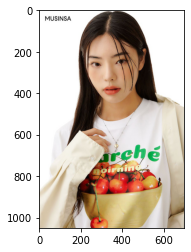

a girl in a red shirt and a white shirt is holding a cup .


In [ ]:
# 예시!!!!

import matplotlib.pyplot as plt
import numpy as np

# 이미지 및 생성된 캡션(caption) 문장 출력
image = Image.open(image_path)
plt.imshow(np.asarray(image))
plt.show()
print(sentence)

### 적용

In [ ]:
# 언플루언서 (2시간 정도 소요)

import pandas as pd
import os
import re

dataframe=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_전처리.xlsx')


new_en_text=[]

# 이미지 경로 설정 len(dataframe)
for image_index in range(len(dataframe)):

  name=dataframe.loc[image_index]['user_name']
  post_id=dataframe.loc[image_index]['post_id']

  # 이미지 경로 지정!
  image_path=f'./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/{name}/images/{post_id}.jpg'
  print(image_path)
  image = load_image(image_path, transform)


  try:
    #-----------------------------------------------------------------
    # 이미지 전처리(image preprocessing)
    transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Load vocabulary wrapper
    # Vocabulary 객체 생성
    vocab = Vocabulary()
    with open(vocab_path, 'rb') as f:
        vocab = pickle.load(f)

    # Build models
    encoder = EncoderCNN(embed_size).eval() # eval mode (batchnorm uses moving mean/variance)
    decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers)
    encoder = encoder.to(device)
    decoder = decoder.to(device)

    # Load the trained model parameters
    encoder.load_state_dict(torch.load(encoder_path , map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))) # 모델이 gpu에서 훈련되었기에, gpu를 사용하지 못하는 경우 map_location = torch.device('cpu')를 해줘야 함. 
    decoder.load_state_dict(torch.load(decoder_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))

    # Prepare an image
    #image = load_image(image_path, transform)
    image_tensor = image.to(device)

    # Generate an caption from the image
    feature = encoder(image_tensor)
    sampled_ids = decoder.sample(feature)
    sampled_ids = sampled_ids[0].cpu().numpy() # (1, max_seq_length) -> (max_seq_length)

    # Convert word_ids to words
    sampled_caption = []
    for word_id in sampled_ids: # 하나씩 단어 인덱스를 확인하며
        word = vocab.idx2word[word_id] # 단어 문자열로 바꾸어 삽입
        if word not in ['<start>', '<unk>', '<end>']:
            sampled_caption.append(word)
        if word == '<end>':
            break
    sentence = ' '.join(sampled_caption)

    # 데이터 프레임에 추가하기 전 전처리
    image_captioning_result=re.sub('[^A-Za-z가-힣]',' ',sentence).split()

    old_en_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['en_text']).split()

    # 기존 en_text 필드에 추가
    new_en_text.append(old_en_text + image_captioning_result)


  except:
    image_captioning_result=[]
    old_en_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['en_text']).split()
    new_en_text.append(old_en_text + image_captioning_result)

  #-----------------------------------------------

dataframe.drop(['en_text'],axis=1,inplace=True)
dataframe['en_text']=new_en_text
# dataframe.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_전처리_image_captioning.xlsx')


./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3008721893260657311.jpg


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3003648281577546327.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/2997852449997755545.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3008794918635042204.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3008710813922767565.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3008175194287636145.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3008168925992508213.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3008161646391880729.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3007967081933850651.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3007964890896731324.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@by_he.nique/images/3007

In [ ]:
# 상품정보

import pandas as pd
import os
import re

dataframe=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_전처리.xlsx')

new_en_text=[]

for image_index in range(len(dataframe)):
  image_id=dataframe.loc[image_index]['image_id']
  # 이미지 경로설정
  image_path=f'./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/{image_id}'
  print(image_path)

  try:
    #-----------------------------------------------------------------
    # 이미지 전처리(image preprocessing)
    transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Load vocabulary wrapper
    # Vocabulary 객체 생성
    vocab = Vocabulary()
    with open(vocab_path, 'rb') as f:
        vocab = pickle.load(f)

    # Build models
    encoder = EncoderCNN(embed_size).eval() # eval mode (batchnorm uses moving mean/variance)
    decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers)
    encoder = encoder.to(device)
    decoder = decoder.to(device)

    # Load the trained model parameters
    encoder.load_state_dict(torch.load(encoder_path , map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))) # 모델이 gpu에서 훈련되었기에, gpu를 사용하지 못하는 경우 map_location = torch.device('cpu')를 해줘야 함. 
    decoder.load_state_dict(torch.load(decoder_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))

    # Prepare an image
    image = load_image(image_path, transform)
    image_tensor = image.to(device)

    # Generate an caption from the image
    feature = encoder(image_tensor)
    sampled_ids = decoder.sample(feature)
    sampled_ids = sampled_ids[0].cpu().numpy() # (1, max_seq_length) -> (max_seq_length)

    # Convert word_ids to words
    sampled_caption = []
    for word_id in sampled_ids: # 하나씩 단어 인덱스를 확인하며
        word = vocab.idx2word[word_id] # 단어 문자열로 바꾸어 삽입
        if word not in ['<start>', '<unk>', '<end>']:
            sampled_caption.append(word)
        if word == '<end>':
            break
    # 결과
    sentence = ' '.join(sampled_caption)

    # 데이터 프레임에 추가하기 전 전처리
    image_captioning_result=re.sub('[^A-Za-z가-힣]',' ',sentence).split()
    
    # 기존 en_text 필드에 추가
    new_en_text.append(image_captioning_result)
  except:
    image_captioning_result=[]
    new_en_text.append(image_captioning_result)

  #-----------------------------------------------

dataframe['en_text']=new_en_text
dataframe.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_전처리_image_captioning.xlsx')



./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_1_500.jpg


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_5_500.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_2_500.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_4_500.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_3_500.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_6_500.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30058_2_500.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30058_5_500.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘ᄑ

In [ ]:
# 소비자

import pandas as pd
import os
import re

dataframe=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_전처리.xlsx')


new_en_text=[]

# 이미지 경로 설정 len(dataframe)
for image_index in range(len(dataframe)):

  name=dataframe.loc[image_index]['user_name']
  post_id=dataframe.loc[image_index]['post_id']



 #-----------------------------------------------------------------
  # 이미지 전처리(image preprocessing)
  transform = transforms.Compose([
      transforms.ToTensor(), 
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  # Load vocabulary wrapper
  # Vocabulary 객체 생성
  vocab = Vocabulary()
  with open(vocab_path, 'rb') as f:
      vocab = pickle.load(f)

  # Build models
  encoder = EncoderCNN(embed_size).eval() # eval mode (batchnorm uses moving mean/variance)
  decoder = DecoderRNN(embed_size, hidden_size, len(vocab), num_layers)
  encoder = encoder.to(device)
  decoder = decoder.to(device)

  # Load the trained model parameters
  encoder.load_state_dict(torch.load(encoder_path , map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))) # 모델이 gpu에서 훈련되었기에, gpu를 사용하지 못하는 경우 map_location = torch.device('cpu')를 해줘야 함. 
  decoder.load_state_dict(torch.load(decoder_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))

# ------------------------------------------------------------

  # 이미지 경로 지정!
  try:
    image_path=f'./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/{name}/images/{post_id}.jpg'
    print(image_path)
    image = load_image(image_path, transform)
  except:
    image_path=f'./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/{name}/images/{post_id}/j_g_ok_{post_id}.jpg'
    print(image_path)
    if name=='@j_g_ok':
      try:
        image = load_image(image_path, transform)
      except:
        pass

  try:
    # Prepare an image
    #image = load_image(image_path, transform)
    image_tensor = image.to(device)

    # Generate an caption from the image
    feature = encoder(image_tensor)
    sampled_ids = decoder.sample(feature)
    sampled_ids = sampled_ids[0].cpu().numpy() # (1, max_seq_length) -> (max_seq_length)

    # Convert word_ids to words
    sampled_caption = []
    for word_id in sampled_ids: # 하나씩 단어 인덱스를 확인하며
        word = vocab.idx2word[word_id] # 단어 문자열로 바꾸어 삽입
        if word not in ['<start>', '<unk>', '<end>']:
            sampled_caption.append(word)
        if word == '<end>':
            break
    sentence = ' '.join(sampled_caption)

    # 데이터 프레임에 추가하기 전 전처리
    image_captioning_result=re.sub('[^A-Za-z가-힣]',' ',sentence).split()

    old_en_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['en_text']).split()

    # 기존 en_text 필드에 추가
    new_en_text.append(old_en_text + image_captioning_result)


  except:
    image_captioning_result=[]
    old_en_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['en_text']).split()
    new_en_text.append(old_en_text + image_captioning_result)

  #-----------------------------------------------

dataframe.drop(['en_text'],axis=1,inplace=True)
dataframe['en_text']=new_en_text
dataframe.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_전처리_image_captioning.xlsx')


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@agree_seop/images/201.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/330.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/329.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/328.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/328/j_g_ok_328.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/327.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/327/j_g_ok_327.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/326.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/326/j_g_ok_326.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/325.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/324.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/323.jpg
./drive/MyDrive/제 3회 KUIAI 해커톤/데ᄋ

## 형태소 분석 및 불용어 처리  
- 한국어 flow - konlpy.tag의 Okt 모듈을 이용해 토근화 진행 후 사전에 준비한 불용어 리스트를 이용
- 영어 flow - nltk 라이브러리의 sent_tokenize 모듈을 이용해 토근화 진행 후 nltk 라이브러리의 stopwords 모듈 이용해 불용어 처리


In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 34.2 MB/s eta 0:00:00


In [ ]:
# 한국
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import os

txt_file=os.path.join("/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/한국어 불용어.txt")
word=open(txt_file)

# 불용어 리스트
korean_list=[]

for line in word.readlines():
  korean_list.append(line.strip())

word.close()


In [ ]:
# 영어
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# 불용어 리스트
english_list=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## KoClip(한국어) 및 Clip(영어) 적용 - 이미지와 단어간의 유사도 측정 단계

### KoClip

#### 모델 - KoClip

In [ ]:
import os
os.chdir('/content/drive/MyDrive/제 3회 KUIAI 해커톤/koCLIP_files')

In [ ]:
%cd koclip 

/content/drive/.shortcut-targets-by-id/1SMGK8chU2lwP62zecImE8xvy7TlJccBA/제 3회 KUIAI 해커톤/koCLIP_files/koclip


In [ ]:
%%capture
!pip install -r requirements.txt

In [ ]:
import requests
import jax
from PIL import Image
from koclip import load_koclip

model, processor = load_koclip("koclip-base")

Downloading:   0%|          | 0.00/4.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.70G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/568 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/862k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/752k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/173 [00:00<?, ?B/s]

#### 적용

In [ ]:
# 인플루언서_koCLIP

import pandas as pd
import os
import re

dataframe=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_전처리_last.xlsx')


ko_Text=[]
ko_Prob=[]

# len(dataframe)
order=1
for image_index in range(len(dataframe)):
  print(order)
  order=order+1
  try:
    name=dataframe.loc[image_index]['user_name']
    post_id=dataframe.loc[image_index]['post_id']
    image_path=f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/{name}/images/{post_id}.jpg'
    print(image_path)
    image = Image.open(image_path)

    # 단어 정보 하나의 리스트로 관리
    temp_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['kr_text']).split()
    print(temp_text)

    inputs = processor(
      text=temp_text,
      images=image, 
      return_tensors="jax", # could also be "pt" 
      padding=True
    )
    outputs = model(**inputs)
    probs = jax.nn.softmax(outputs.logits_per_image, axis=1)

    ko_Text.append(temp_text)
    ko_Prob.append(probs[0])
    print(probs[0])

  except:
    ko_Text.append([])
    ko_Prob.append([])

# 불필요한 컬럼 제거
dataframe.drop(['kr_text'],axis=1,inplace=True)
dataframe.drop(['en_text'],axis=1,inplace=True)

dataframe['ko_Text']=ko_Text
dataframe['ko_Prob']=ko_Prob
dataframe.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_koCLIP.xlsx')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 0.00163051 0.00260061 0.00471352 0.00207678 0.00136823 0.00132785
 0.00344332 0.00231504 0.06915376 0.0072288  0.00023441 0.00320564
 0.01600527 0.00219071 0.00554343 0.00819271 0.0017537  0.00501801
 0.01580838 0.0072288  0.0021552  0.00165388 0.00109494 0.01478603
 0.00311303 0.0115789  0.00501801 0.00223627 0.00045869 0.00076577
 0.00967272 0.00877948 0.00319024 0.00493506 0.00994695 0.0973665
 0.01155769 0.00092527 0.00967272 0.00298277 0.00308344 0.00121772
 0.00326793 0.00187778 0.01120893 0.00256129 0.07063565 0.02924795
 0.00937891 0.00256457 0.03789788 0.00625904 0.0076814  0.00863082
 0.00175876 0.00133572 0.00103882 0.00173633 0.01675951 0.06149285
 0.00210116 0.00560186 0.01165545 0.00877948 0.00967272 0.23254801
 0.00363492 0.00276189]
2410
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@k_8_8bsoo/images/2981871279033755384.jpg
['광고', '너의', '일상에', '멋을', '더해주길', '르마드', '코트는', '역시', '많을수록', '좋아', '울', '블렌드', '발마칸', '코트',

In [ ]:
# 상품정보_koCLIP

import pandas as pd
import os
import re

dataframe=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_전처리_image_captioning.xlsx')


ko_Text=[]
ko_Prob=[]
# len(dataframe)
for image_index in range(len(dataframe)):
  try:
    image_id=dataframe.loc[image_index]['image_id']
    image_path=f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/{image_id}'
    print(image_path)
    image = Image.open(image_path)

    temp_category=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['category']).split()
    temp_look_name=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['look_name']).split()
    temp_style_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['style_text']).split()
    temp_tag=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['tag']).split()

    # 단어 정보 하나의 리스트로 관리
    temp_text=temp_category+temp_look_name+temp_style_text+temp_tag
    inputs = processor(
      text=temp_text,
      images=image, 
      return_tensors="jax", # could also be "pt" 
      padding=True
    )
    outputs = model(**inputs)
    probs = jax.nn.softmax(outputs.logits_per_image, axis=1)

    ko_Text.append(temp_text)
    ko_Prob.append(probs[0])
    print(probs[0])
  except:
    ko_Text.append([])
    ko_Prob.append([])

# 불필요한 컬럼 제거
dataframe.drop(['category'],axis=1,inplace=True)
dataframe.drop(['look_name'],axis=1,inplace=True)
dataframe.drop(['style_text'],axis=1,inplace=True)
dataframe.drop(['tag'],axis=1,inplace=True)
# 영어 단어는 CLIP에서 활용
dataframe.drop(['en_text'],axis=1,inplace=True)

dataframe['ko_Text']=ko_Text
dataframe['ko_Prob']=ko_Prob
dataframe.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_koCLIP.xlsx')


/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_1_500.jpg
[0.00738466 0.02121202 0.0227772  0.00583727 0.01285635 0.01014496
 0.00340093 0.03299391 0.00718468 0.11580962 0.12219201 0.00916131
 0.00501973 0.00738466 0.22748545 0.0066626  0.00738466 0.05043818
 0.00226436 0.03076491 0.00434018 0.00775915 0.1256793  0.05371006
 0.05541692 0.00340093 0.00459309 0.0178395  0.01317032 0.00573101]
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_5_500.jpg
[0.01519621 0.04100677 0.00642177 0.00690802 0.01168072 0.01580681
 0.02400734 0.00323573 0.01852817 0.14158182 0.28657657 0.01321961
 0.00653437 0.01519621 0.04710519 0.01250518 0.01519621 0.01138267
 0.01553205 0.07315879 0.0014581  0.01128324 0.04280271 0.02216573
 0.02111794 0.02400734 0.01193394 0.04074035 0.03059961 0.0131109 ]
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상

In [ ]:
# 소비자

import pandas as pd
import os
import re

dataframe=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_전처리_image_captioning.xlsx')


ko_Text=[]
ko_Prob=[]

# len(dataframe)
order=1
for image_index in range(len(dataframe)):
  print(order)
  order=order+1
  name=dataframe.loc[image_index]['user_name']
  post_id=dataframe.loc[image_index]['post_id']


#---------
  try:
    image_path=f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/{name}/images/{post_id}.jpg'
    print(image_path)
    image = Image.open(image_path)
  except:
    image_path=f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/{name}/images/{post_id}/j_g_ok_{post_id}.jpg'
    print(image_path)
    if name=='@j_g_ok':
      try:
        image = Image.open(image_path)
      except:
        pass
#----------

  try:

    # 단어 정보 하나의 리스트로 관리
    temp_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['kr_text']).split()
    print(temp_text)

    inputs = processor(
      text=temp_text,
      images=image, 
      return_tensors="jax", # could also be "pt" 
      padding=True
    )
    outputs = model(**inputs)
    probs = jax.nn.softmax(outputs.logits_per_image, axis=1)

    ko_Text.append(temp_text)
    ko_Prob.append(probs[0])
    print(probs[0])

  except:
    ko_Text.append([])
    ko_Prob.append([])

# 불필요한 컬럼 제거
dataframe.drop(['kr_text'],axis=1,inplace=True)
dataframe.drop(['en_text'],axis=1,inplace=True)

dataframe['ko_Text']=ko_Text
dataframe['ko_Prob']=ko_Prob
dataframe.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_koCLIP.xlsx')



1
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@agree_seop/images/201.jpg
['연대', '탐방기']
[0.24493918 0.75506085]
2
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/330.jpg
['광고']
[1.]
3
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/329.jpg
['전', '잘', '있습니다', '메리메리']
[0.16506694 0.16621386 0.47711146 0.19160773]
4
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/328.jpg
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/328/j_g_ok_328.jpg
['아', '이', '커버', '마음에', '든다', '보통날', '영원히맑은하늘']
[0.1105509  0.31696022 0.16436905 0.06210269 0.26603493 0.00601794
 0.07396431]
5
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/327.jpg
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/327/j_g_ok_327.jpg
['스무', '번의', '실패', '후', '테이크에', '성공', '카라']
[0.17145284 0.01534442 0.22190206 0.0632514  0.13761611 0.2086501
 0.18178302]
6
/

### Clip

#### 모델-Clip

In [ ]:
import os
os.chdir('/content/drive/MyDrive/제 3회 KUIAI 해커톤/CLIP_files')

In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ioqa7tzw
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ioqa7tzw
  Resolved https://github.com/openai/CLIP.git to commit d50d76daa670286dd6cacf3bcd80b5e4823fc8e1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369408 sha256=f6f2963d991861d0fb6e3a3d112e24f9e65bd4cfbd1971cc93c5dc8a65f5f78b
  Stored in directory: /tmp/pip-ephem-wheel-cache-8nb9d0f4/wheels/ab/4f/3a/5e51521b55997aa6f0690e095c08824219753128ce8d9969a3
Successfully built clip


In [ ]:
import torch
import clip
from PIL import Image

img_path = '/content/drive/MyDrive/제 3회 KUIAI 해커톤/testing_image/detail_28796_4_500.jpg'
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:09<00:00, 35.8MiB/s]


#### 적용

In [ ]:
# 인플루언서_CLIP

import pandas as pd
import os
import re

dataframe=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_전처리_last.xlsx')


en_Text=[]
en_Prob=[]

# len(dataframe)
for image_index in range(len(dataframe)):
  try:

    name=dataframe.loc[image_index]['user_name']
    post_id=dataframe.loc[image_index]['post_id']
    image_path=f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/{name}/images/{post_id}.jpg'

    print(image_path)
  
    image = Image.open(image_path)

    # 단어 정보 하나의 리스트로 관리
    temp_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['en_text']).split()
    print(temp_text)

    image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
    text = clip.tokenize(temp_text).to(device)

    with torch.no_grad():
      logits_per_image, _ = model(image, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    en_Text.append(temp_text)
    en_Prob.append(probs[0])
    print(probs[0])
  except:
    en_Text.append([])
    en_Prob.append([])

# 불필요한 컬럼 제거
dataframe.drop(['kr_text'],axis=1,inplace=True)
dataframe.drop(['en_text'],axis=1,inplace=True)

dataframe['en_Text']=en_Text
dataframe['en_Prob']=en_Prob
dataframe.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_CLIP.xlsx')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['a', 'woman', 'in', 'a', 'white', 'dress', 'is', 'sitting', 'on', 'a', 'bench']
[0.16034138 0.03735435 0.12456831 0.16034138 0.12542778 0.01172024
 0.1358761  0.01010044 0.06407996 0.16034138 0.00984873]
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@moodonx2/images/2988083796647075896.jpg
['a', 'man', 'and', 'a', 'woman', 'are', 'sitting', 'on', 'a', 'bench']
[0.17703877 0.01485431 0.03419547 0.17703877 0.0412443  0.2858099
 0.01115226 0.07075303 0.17703877 0.01087434]
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@moodonx2/images/2987372096943799748.jpg
['a', 'woman', 'sitting', 'on', 'a', 'bench', 'with', 'a', 'white', 'dog']
[0.19320181 0.04500977 0.01217042 0.07721254 0.19320181 0.01186713
 0.12205997 0.19320181 0.15113302 0.00094161]
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/인플루언서/@moodonx2/images/2986981052007751738.jpg
['a', 'young', 'boy', 'is', 'sitting', 'on', 'a', 'couch']
[0.2617259

In [ ]:
# 상품정보_CLIP

import pandas as pd
import os
import re

dataframe=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_전처리_image_captioning.xlsx')

# 단어 합치기
# koCLIP_result=[]

en_Text=[]
en_Prob=[]
# len(dataframe)
for image_index in range(len(dataframe)):
  try:
    image_id=dataframe.loc[image_index]['image_id']
    image_path=f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/{image_id}'
    print(image_path)
    image = Image.open(image_path)

    # 단어 정보 하나의 리스트로 관리
    temp_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['en_text']).split()
    print(temp_text)

    image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
    text = clip.tokenize(temp_text).to(device)

    with torch.no_grad():
      logits_per_image, _ = model(image, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    en_Text.append(temp_text)
    en_Prob.append(probs[0])
    print(probs[0])
  except:
    en_Text.append([])
    en_Prob.append([])

# 불필요한 컬럼 제거
dataframe.drop(['category'],axis=1,inplace=True)
dataframe.drop(['look_name'],axis=1,inplace=True)
dataframe.drop(['style_text'],axis=1,inplace=True)
dataframe.drop(['tag'],axis=1,inplace=True)
# 영어 단어는 CLIP에서 활용
dataframe.drop(['en_text'],axis=1,inplace=True)

dataframe['en_Text']=en_Text
dataframe['en_Prob']=en_Prob
dataframe.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_CLIP.xlsx')


/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_1_500.jpg
['a', 'man', 'with', 'a', 'red', 'hat', 'and', 'a', 'hat', 'is', 'sitting', 'on', 'a', 'bench']
[0.14994292 0.01258085 0.09473011 0.14994292 0.03423491 0.01203846
 0.02896184 0.14994292 0.01203846 0.12706427 0.0094454  0.05992425
 0.14994264 0.00921007]
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_5_500.jpg
['a', 'man', 'with', 'a', 'red', 'hat', 'and', 'a', 'white', 'shirt', 'and', 'a', 'hat']
[0.04239358 0.003557   0.02678318 0.04239358 0.00967929 0.00340365
 0.00818842 0.04239358 0.03316258 0.73405945 0.00818842 0.04239358
 0.00340366]
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/상품정보_샘플/무신사_크롤링데이터_샘플/캐주얼/Image/detail_30059_2_500.jpg
['a', 'man', 'with', 'a', 'white', 'beard', 'and', 'a', 'hat', 'is', 'sitting', 'on', 'a', 'bench']

In [ ]:
# 소비자

import pandas as pd
import os
import re

dataframe=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_전처리_image_captioning.xlsx')


en_Text=[]
en_Prob=[]

# len(dataframe)
for image_index in range(len(dataframe)):

  name=dataframe.loc[image_index]['user_name']
  post_id=dataframe.loc[image_index]['post_id']



#---------
  try:
    image_path=f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/{name}/images/{post_id}.jpg'
    print(image_path)
    image = Image.open(image_path)
  except:
    image_path=f'/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/{name}/images/{post_id}/j_g_ok_{post_id}.jpg'
    print(image_path)
    if name=='@j_g_ok':
      try:
        image = Image.open(image_path)
      except:
        pass
#----------

    print(image_path)
  
  try:
    # 단어 정보 하나의 리스트로 관리
    temp_text=re.sub('[^A-Za-z가-힣]',' ',dataframe.loc[image_index]['en_text']).split()
    print(temp_text)

    image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
    text = clip.tokenize(temp_text).to(device)

    with torch.no_grad():
      logits_per_image, _ = model(image, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    en_Text.append(temp_text)
    en_Prob.append(probs[0])
    print(probs[0])
  except:
    en_Text.append([])
    en_Prob.append([])

# 불필요한 컬럼 제거
dataframe.drop(['kr_text'],axis=1,inplace=True)
dataframe.drop(['en_text'],axis=1,inplace=True)

dataframe['en_Text']=en_Text
dataframe['en_Prob']=en_Prob
dataframe.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_CLIP.xlsx')

/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@agree_seop/images/201.jpg
['a', 'man', 'is', 'sitting', 'on', 'a', 'bench', 'with', 'his', 'arms', 'outstretched']
[0.23297739 0.0195478  0.19742914 0.01467602 0.09310874 0.23297739
 0.01431029 0.14718917 0.03949306 0.00649682 0.00179425]
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/330.jpg
['GucciJackie', 'a', 'woman', 'with', 'a', 'baby', 'is', 'sitting', 'on', 'a', 'couch']
[0.6137693  0.07229318 0.01684197 0.04567299 0.07229318 0.00416511
 0.06126251 0.00455399 0.02889176 0.07229318 0.00796289]
/content/drive/MyDrive/제 3회 KUIAI 해커톤/데이터/소비자정보_샘플/@dlwlrma/images/329.jpg
['a', 'young', 'boy', 'wearing', 'a', 'blue', 'shirt', 'and', 'a', 'blue', 'shirt', 'is', 'holding', 'a', 'cup']
[0.02401509 0.00836276 0.00125736 0.03310168 0.02401509 0.00045158
 0.41582945 0.00463857 0.02401509 0.00045158 0.41582945 0.02035081
 0.00126351 0.02401504 0.00240292]
/content/drive/MyDrive/제 3회 KUIAI 해

## 한글 영어 Text에 대해 각각 최대 상위(유사도 기준) 6개 단어 추출  
- 추출된 영단어의 경우 googletrans를 통해 한국어로 번역 후 사용

#### googletrans

In [ ]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 5.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17414 sha256=39bf810ace4fae2db7d7361e20147edf118853c386610e8fb2a457304bede76a
  Stored in directory: /root/.cache/pip/wheels/a9/25/af/715361fa79594524c89c75d293def652045f3fdce6ca398712
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0


#### 정렬을 위한 전처리 (유사도 -> 실수 변환 + {단어 : 유사도} 정리)

In [ ]:
# 인플루언서
인플루언서_CLIP=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_CLIP.xlsx')
인플루언서_koCLIP=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_koCLIP.xlsx')

float_인플루언서_CLIP=[]
en_Text_인플루언서=[]
인플루언서_CLIP_dict=[]

float_인플루언서_koCLIP=[]
ko_Text_인플루언서=[]
인플루언서_koCLIP_dict=[]


for 인플루언서_index in range(len(인플루언서_CLIP)):

  # 인플루언서_CLIP
  temp_CLIP_text=re.sub('[^A-Za-z가-힣]',' ',인플루언서_CLIP.loc[인플루언서_index]['en_Text']).split()
  temp_CLIP_dict={}

  if (len(temp_CLIP_text)):
    temp_prob=인플루언서_CLIP.loc[인플루언서_index]['en_Prob'].split()
    temp_prob[0]=temp_prob[0][1:] ;temp_prob[-1]=temp_prob[-1][:-1]

    # 단어와 유사도 매칭 향후 키:값 형태 활용
    for index in range(len(temp_prob)):
      try:
        temp_CLIP_dict[temp_CLIP_text[index]]=float(temp_prob[index])
      except:
        pass
  인플루언서_CLIP_dict.append(temp_CLIP_dict)


  # 인플루언서_koCLIP
  temp_koCLIP_text=re.sub('[^A-Za-z가-힣]',' ',인플루언서_koCLIP.loc[인플루언서_index]['ko_Text']).split()
  temp_koCLIP_dict={}

  if (len(temp_koCLIP_text)):
    temp_prob=인플루언서_koCLIP.loc[인플루언서_index]['ko_Prob'].split()
    temp_prob[0]=temp_prob[0][1:] ;temp_prob[-1]=temp_prob[-1][:-1]


    # 단어와 유사도 매칭 향후 키:값 형태 활용
    for index in range(len(temp_prob)):
      try:
        temp_koCLIP_dict[temp_koCLIP_text[index]]=float(temp_prob[index])
      except:
        pass

  인플루언서_koCLIP_dict.append(temp_koCLIP_dict)

  인플루언서_ko_result=[]

# 한국어의 경우 먼저 상위 6개 선택
for 인플루언서_ko_clip in 인플루언서_koCLIP_dict:

  temp_list=list(인플루언서_ko_clip.keys())
  good_word=[]

  # 유사도를 기준으로 정렬하기 위해 사용할 임시 리스트
  temp=[]
  for check in temp_list:
    if check not in korean_list:
      good_word.append(check)
  
  for check in good_word:
    temp.append([인플루언서_ko_clip[check],check])

  if temp:
    temp.sort(reverse=True)
  result=[]
  for select in temp[:6]:
    result.append(select[1])
  인플루언서_ko_result.append(result)

In [ ]:
# 상품정보
상품정보_CLIP=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_CLIP.xlsx')
상품정보_koCLIP=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_koCLIP.xlsx')

float_상품정보_CLIP=[]
en_Text_상품정보=[]
상품정보_CLIP_dict=[]

float_상품정보_koCLIP=[]
ko_Text_상품정보=[]
상품정보_koCLIP_dict=[]

for 상품정보_index in range(len(상품정보_CLIP)):

  temp_CLIP_text=re.sub('[^A-Za-z가-힣]',' ',상품정보_CLIP.loc[상품정보_index]['en_Text']).split()
  temp_CLIP_dict={}

  if (len(temp_CLIP_text)):
    temp_prob=상품정보_CLIP.loc[상품정보_index]['en_Prob'].split()
    temp_prob[0]=temp_prob[0][1:] ;temp_prob[-1]=temp_prob[-1][:-1]

    # 단어와 유사도 매칭 향후 키:값 형태 활용
    for index in range(len(temp_prob)):
      try:
        temp_CLIP_dict[temp_CLIP_text[index]]=float(temp_prob[index])
      except:
        pass
  상품정보_CLIP_dict.append(temp_CLIP_dict)



  temp_koCLIP_text=re.sub('[^A-Za-z가-힣]',' ',상품정보_koCLIP.loc[상품정보_index]['ko_Text']).split()
  temp_koCLIP_dict={}

  if (len(temp_koCLIP_text)):
    temp_prob=상품정보_koCLIP.loc[상품정보_index]['ko_Prob'].split()
    temp_prob[0]=temp_prob[0][1:] ;temp_prob[-1]=temp_prob[-1][:-1]

    # 단어와 유사도 매칭 향후 키:값 형태 활용
    for index in range(len(temp_prob)):
      try:
        temp_koCLIP_dict[temp_koCLIP_text[index]]=float(temp_prob[index])
      except:
        pass
  상품정보_koCLIP_dict.append(temp_koCLIP_dict)


  
상품정보_ko_result=[]

for 상품정보_ko_clip in 상품정보_koCLIP_dict:
  temp_list=list(상품정보_ko_clip.keys())
  good_word=[]

  # 유사도를 기준으로 정렬하기 위해 사용할 임시 리스트
  temp=[]
  for check in temp_list:
    if check not in korean_list:
      good_word.append(check)
  
  for check in good_word:
    temp.append([상품정보_ko_clip[check],check])

  if temp:
    temp.sort(reverse=True)
  result=[]
  for select in temp[:6]:
    result.append(select[1])
  상품정보_ko_result.append(result)

In [ ]:
# 소비자
소비자_CLIP=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_CLIP.xlsx')
소비자_koCLIP=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_koCLIP.xlsx')


float_소비자_CLIP=[]
en_Text_소비자=[]
소비자_CLIP_dict=[]

float_소비자_koCLIP=[]
ko_Text_소비자=[]
소비자_koCLIP_dict=[]

for 소비자_index in range(len(소비자_CLIP)):

  # 소비자_CLIP
  temp_CLIP_text=re.sub('[^A-Za-z가-힣]',' ',소비자_CLIP.loc[소비자_index]['en_Text']).split()
  temp_CLIP_dict={}

  if (len(temp_CLIP_text)):
    temp_prob=소비자_CLIP.loc[소비자_index]['en_Prob'].split()
    temp_prob[0]=temp_prob[0][1:] ;temp_prob[-1]=temp_prob[-1][:-1]

    # 단어와 유사도 매칭 향후 키:값 형태 활용
    for index in range(len(temp_prob)):
      try:
        temp_CLIP_dict[temp_CLIP_text[index]]=float(temp_prob[index])
      except:
        pass
  소비자_CLIP_dict.append(temp_CLIP_dict)


  # 소비자_koCLIP
  temp_koCLIP_text=re.sub('[^A-Za-z가-힣]',' ',소비자_koCLIP.loc[소비자_index]['ko_Text']).split()
  temp_koCLIP_dict={}

  if (len(temp_koCLIP_text)):
    temp_prob=소비자_koCLIP.loc[소비자_index]['ko_Prob'].split()
    temp_prob[0]=temp_prob[0][1:] ;temp_prob[-1]=temp_prob[-1][:-1]


    # 단어와 유사도 매칭 향후 키:값 형태 활용
    for index in range(len(temp_prob)):
      try:
        temp_koCLIP_dict[temp_koCLIP_text[index]]=float(temp_prob[index])
      except:
        pass

  소비자_koCLIP_dict.append(temp_koCLIP_dict)


소비자_ko_result=[]

for 소비자_ko_clip in 소비자_koCLIP_dict:
  temp_list=list(소비자_ko_clip.keys())
  good_word=[]

  # 유사도를 기준으로 정렬하기 위해 사용할 임시 리스트
  temp=[]
  for check in temp_list:
    if check not in korean_list:
      good_word.append(check)
  
  for check in good_word:
    temp.append([소비자_ko_clip[check],check])

  if temp:
    temp.sort(reverse=True)
  result=[]
  for select in temp[:6]:
    result.append(select[1])
  소비자_ko_result.append(result)


In [ ]:
# 사전 목록
#인플루언서_CLIP_dict
#인플루언서_koCLIP_dict
#상품정보_CLIP_dict
#상품정보_koCLIP_dict
#소비자_CLIP_dict
#소비자_koCLIP_dict

#### 영단어 정렬 결과 번역(영단어 -> 한국어)  
- 만들어진 사전 중 CLIP에 해당하는 dict에 적용

In [ ]:
# 함수 정의
from googletrans import Translator
import time

def translate_list(words: list):
    translator = Translator()

    return [
        translator.translate(word, dest='ko').text for word in words
    ]

In [ ]:
# 인플루언서
인플루언서_result=[]
for 인플루언서_clip in 인플루언서_CLIP_dict[:]:

  try:
    time.sleep(1)
    temp_list=list(인플루언서_clip.keys())
    good_word=[]

    # 유사도를 기준으로 정렬하기 위해 사용할 임시 리스트
    temp=[]
    for check in temp_list:
      if check not in stopwords.words('english'):
        good_word.append(check)
    
    for check in good_word:
      temp.append([인플루언서_clip[check],check])

    if temp:
      temp.sort(reverse=True)

    result=[]
    for select in temp[:6]:
      result.append(select[1])
    
    result=translate_list(result)
    print(result)
    인플루언서_result.append(result)
    print(order)
    order=order+1
  except:
    print("!!!!")
    time.sleep(10)
    result=translate_list(result)
    print(result)
    인플루언서_result.append(result)

In [ ]:
# 상품정보
상품정보_result=[]

for 상품정보_clip in 상품정보_CLIP_dict:

  try:
    time.sleep(1)
    temp_list=list(상품정보_clip.keys())
    good_word=[]

    # 유사도를 기준으로 정렬하기 위해 사용할 임시 리스트
    temp=[]
    for check in temp_list:
      if check not in stopwords.words('english'):
        good_word.append(check)
    
    for check in good_word:
      temp.append([상품정보_clip[check],check])

    if temp:
      temp.sort(reverse=True)

    result=[]
    for select in temp[:6]:
      result.append(select[1])

    result=translate_list(result)
    상품정보_result.append(result)
    print(order)
    order=order+1
  except:
    print("!!!!")
    time.sleep(10)
    result=translate_list(result)
    print(result)
    상품정보_result.append(result)

In [ ]:
# 소비자
소비자_result=[]
for 소비자_clip in 소비자_CLIP_dict[:]:
  print(소비자_clip)

  try:
    time.sleep(1)
    temp_list=list(소비자_clip.keys())
    good_word=[]

    # 유사도를 기준으로 정렬하기 위해 사용할 임시 리스트
    temp=[]
    for check in temp_list:
      if check not in stopwords.words('english'):
        good_word.append(check)
    
    for check in good_word:
      temp.append([소비자_clip[check],check])

    if temp:
      temp.sort(reverse=True)

    result=[]
    for select in temp[:6]:
      result.append(select[1])
    
    result=translate_list(result)
    print(result)
    소비자_result.append(result)
    print(order)
    order=order+1
  except:
    print("!!!!")
    time.sleep(10)
    result=translate_list(result)
    print(result)
    소비자_result.append(result)

#### 최종 파일 생성 - (pk - text) 형태

In [ ]:
import pandas
import re 

In [ ]:
# 인플루언서

df_인플루언서=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_CLIP.xlsx')

# 100명
user_name=list(set(list(df_인플루언서['user_name'])))

# 합쳐진 태그 목록
인플루언서_최종_태그=[]
for index_인플루언서 in range(len(df_인플루언서)):
  temp=인플루언서_ko_result[index_인플루언서]+인플루언서_result[index_인플루언서]
  인플루언서_최종_태그.append(temp)

인플루언서_최종={}
for name in user_name:
  인플루언서_최종[name]=""

for index_인플루언서 in range(len(df_인플루언서)):
  name=df_인플루언서.loc[index_인플루언서]['user_name']
  # ,은 향후 구분자
  if (인플루언서_최종_태그[index_인플루언서]):
    인플루언서_최종[name]+=','+" ".join(인플루언서_최종_태그[index_인플루언서])

인플루언서_dict={'user_name':user_name, 'text': [인플루언서_최종[name][1:] for name in user_name]}
index=[i for i in range(1,len(user_name)+1)]
frame = pd.DataFrame(인플루언서_dict,index)
#frame.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/인플루언서_최종.xlsx')

In [ ]:
# 상품정보

df_상품정보=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_CLIP.xlsx')
product=list(set(list(df_상품정보['product'])))

상품정보_최종_태그=[]

for index_상품정보 in range(len(상품정보_koCLIP_dict)):
  temp=상품정보_ko_result[index_상품정보]+상품정보_result[index_상품정보]
  상품정보_최종_태그.append(temp)

상품정보_최종={}
for 제품 in product:
  상품정보_최종[제품]=""

for index_상품 in range(len(df_상품정보)):
  product_num=df_상품정보.loc[index_상품]['product']
  # ,은 향후 구분자
  상품정보_최종[product_num]+=','+" ".join(상품정보_최종_태그[index_상품])

  # 상품정보 최종
상품정보_dict={'product':product, 'text': [상품정보_최종[product_num][1:] for product_num in product]}
index=[i for i in range(1,len(product)+1)]
frame = pd.DataFrame(상품정보_dict,index)
#frame.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/상품정보_최종.xlsx')


In [ ]:
# 소비자

df_소비자=pd.read_excel('/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_CLIP.xlsx')

user_name=list(set(list(df_소비자['user_name'])))

# 합쳐진 태그 목록
소비자_최종_태그=[]
for index_소비자 in range(len(df_소비자)):
  temp=소비자_ko_result[index_소비자]+소비자_result[index_소비자]
  소비자_최종_태그.append(temp)

소비자_최종={}
for name in user_name:
  소비자_최종[name]=""

for index_소비자 in range(len(df_소비자)):
  name=df_소비자.loc[index_소비자]['user_name']
  # ,은 향후 구분자
  if (소비자_최종_태그[index_소비자]):
    소비자_최종[name]+=','+" ".join(소비자_최종_태그[index_소비자])

소비자_dict={'user_name':user_name, 'text': [소비자_최종[name][1:] for name in user_name]}
index=[i for i in range(1,len(user_name)+1)]
frame = pd.DataFrame(소비자_dict,index)
#frame.to_excel(excel_writer='/content/drive/MyDrive/제 3회 KUIAI 해커톤/전처리/소비자_최종.xlsx')